In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from visualization_functions import *

In [2]:
experiment_output_name = 'onApr1NoRandomMinNum10NumExp5RegBeginnerAndGamma_allStates'

In [3]:
experimentation_results = pd.read_csv('./' + experiment_output_name + '.csv') # output file of experiment results
print(experimentation_results['Model Type'].unique())
print(experimentation_results['Reward Type'].unique())
print(experimentation_results['MinMax Type'].unique())


['simple' 'hard' 'ours' 'oursRetrainGamma:99' 'oursRetrainGamma:90'
 'oursRetrainGamma:50' 'oursRetrainGamma:10']
['getRewards' 'constInc']
['Current']


In [4]:
# filter to desired conditions
# experimentation_results = experimentation_results[experimentation_results['Reward Type'] == 'constInc']
experimentation_results = experimentation_results[experimentation_results['Reward Type'] == 'getRewards']
experimentation_results = experimentation_results[experimentation_results['MinMax Type'] == 'Current']
experimentation_results.head()

,User Number,User Type,Embedding List,state,scaled_states,action,reward,reward_cols,embedding,game type,Question Number,Cumultive Reward,Accuracy Percent,Experiment Type,Experiment Run,Model Type,Reward Type,MinMax Type,Num Sessions Per User
0,1,adaptive_learner,"[1.0, 0, 0]","{'prev_is_correct': 1, 'questions_roll_ct': 1,...","{'prev_is_correct': 1, 'questions_roll_ct': 0,...",0,1,"{'earned_reward': 1, 'possible_reward': 1}","[{'Num Attempted': 1, 'Num Correct': 1, 'Curre...",1,1,1.000000,1.000000,"simple, getRewards, Current",1,simple,getRewards,Current,10
1,1,adaptive_learner,"[1.0, 1.0, 0]","{'prev_is_correct': 1, 'questions_roll_ct': 2,...","{'prev_is_correct': 1, 'questions_roll_ct': 0....",1,2,"{'earned_reward': 3, 'possible_reward': 3}","[{'Num Attempted': 1, 'Num Correct': 1, 'Curre...",1,2,1.000000,1.000000,"simple, getRewards, Current",1,simple,getRewards,Current,10
2,1,adaptive_learner,"[1.0, 1.0, 0.0]","{'prev_is_correct': 0, 'questions_roll_ct': 3,...","{'prev_is_correct': 0, 'questions_roll_ct': 0....",2,0,"{'earned_reward': 3, 'possible_reward': 4}","[{'Num Attempted': 1, 'Num Correct': 1, 'Curre...",1,3,0.750000,0.666667,"simple, getRewards, Current",1,simple,getRewards,Current,10
3,1,adaptive_learner,"[1.0, 1.0, 0.0]","{'prev_is_correct': 1, 'questions_roll_ct': 4,...","{'prev_is_correct': 1, 'questions_roll_ct': 0....",1,2,"{'earned_reward': 5, 'possible_reward': 6}","[{'Num Attempted': 1, 'Num Correct': 1, 'Curre...",1,4,0.833333,0.750000,"simple, getRewards, Current",1,simple,getRewards,Current,10
4,1,adaptive_learner,"[1.0, 1.0, 0.5]","{'prev_is_correct': 1, 'questions_roll_ct': 5,...","{'prev_is_correct': 1, 'questions_roll_ct': 0....",2,3,"{'earned_reward': 8, 'possible_reward': 9}","[{'Num Attempted': 1, 'Num Correct': 1, 'Curre...",1,5,0.888889,0.800000,"simple, getRewards, Current",1,simple,getRewards,Current,10


In [5]:
question_max = max(experimentation_results['Question Number'])
final_session = experimentation_results[experimentation_results['Question Number']==question_max] 
final_session.groupby('Model Type')['Cumultive Reward'].mean()

Model Type
hard                   0.827553
ours                   0.819495
oursRetrainGamma:10    0.783975
oursRetrainGamma:50    0.789795
oursRetrainGamma:90    0.788722
oursRetrainGamma:99    0.797050
simple                 0.732385
Name: Cumultive Reward, dtype: float64

In [6]:
# Define the columns to keep and rename
cols_to_keep = ['User Number', 'User Type', 'action', 'reward', 'game type', 'Cumultive Reward', 'Accuracy Percent', 'Question Number', 'Model Type']
new_cols = {'User Number': 'User_Number', 'User Type': 'UserType', 'action': 'Difficulty', 'reward': 'Reward', 
            'game type': 'Game_Type', 'Cumultive Reward': 'cumulative_reward', 'Accuracy Percent': 'Accuracy_Percent', 
            'Question Number': 'Question_Number', 'Model Type': 'Model_Type'}

# Extract unique model types
model_types = experimentation_results['Model Type'].unique()

# Dictionary to store aggregated results
avg_cumulative_rewards = {}

# Loop through each model type, process the data, and store results
for model in model_types:
    filtered_data = experimentation_results[experimentation_results['Model Type'] == model][cols_to_keep].rename(columns=new_cols)
    avg_cumulative_rewards[model] = filtered_data.groupby('UserType')['cumulative_reward'].mean().rename(f"{model}_cumulative_reward")

# Combine all results into a single DataFrame
avg_cumulative_reward_new_all = pd.DataFrame(avg_cumulative_rewards)

avg_cumulative_reward_new_all

,simple,hard,ours,oursRetrainGamma:99,oursRetrainGamma:90,oursRetrainGamma:50,oursRetrainGamma:10
UserType,,,,,,,
adaptive_learner,0.808288,0.850598,0.843088,0.847433,0.843880,0.846649,0.841448
beginner,0.515306,0.682570,0.678713,0.659076,0.648872,0.626016,0.643964
cognitive_decline,0.525163,0.693889,0.668432,0.638202,0.639980,0.633322,0.642906
expert,0.921406,0.936392,0.916304,0.936394,0.927780,0.933014,0.938156
intermediate,0.684923,0.792135,0.798756,0.782447,0.785305,0.771830,0.775225
steady,0.775290,0.855717,0.847919,0.850475,0.834625,0.830289,0.834735


In [7]:
print('Included Models: ', list(experimentation_results['Model Type'].unique()))

print('Included Rewards Types: ', experimentation_results['Reward Type'].unique())

print('Max num questions answered by a single user: ', max(experimentation_results['Question Number']))

Included Models:  ['simple', 'hard', 'ours', 'oursRetrainGamma:99', 'oursRetrainGamma:90', 'oursRetrainGamma:50', 'oursRetrainGamma:10']
Included Rewards Types:  ['getRewards']
Max num questions answered by a single user:  100


Plot saved to: onApr1NoRandomMinNum10NumExp5RegBeginnerAndGamma_allStates/spider_reward.png


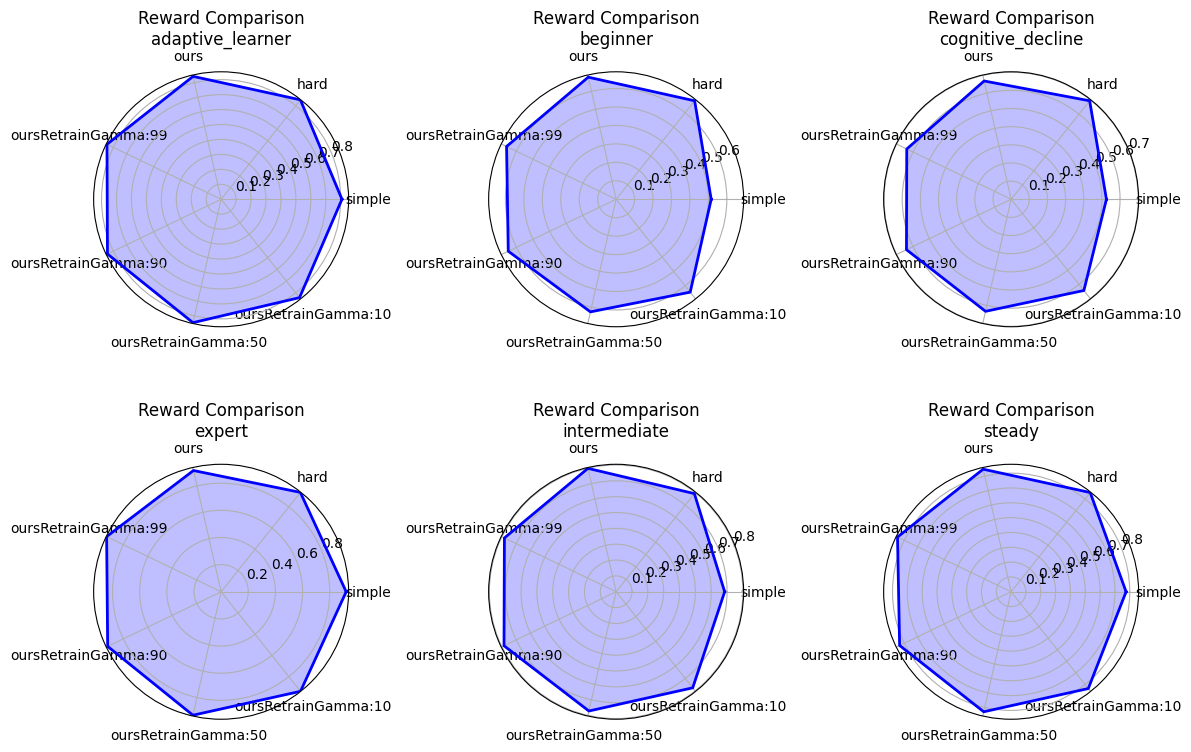

Plot saved to: onApr1NoRandomMinNum10NumExp5RegBeginnerAndGamma_allStates/bar_reward.png


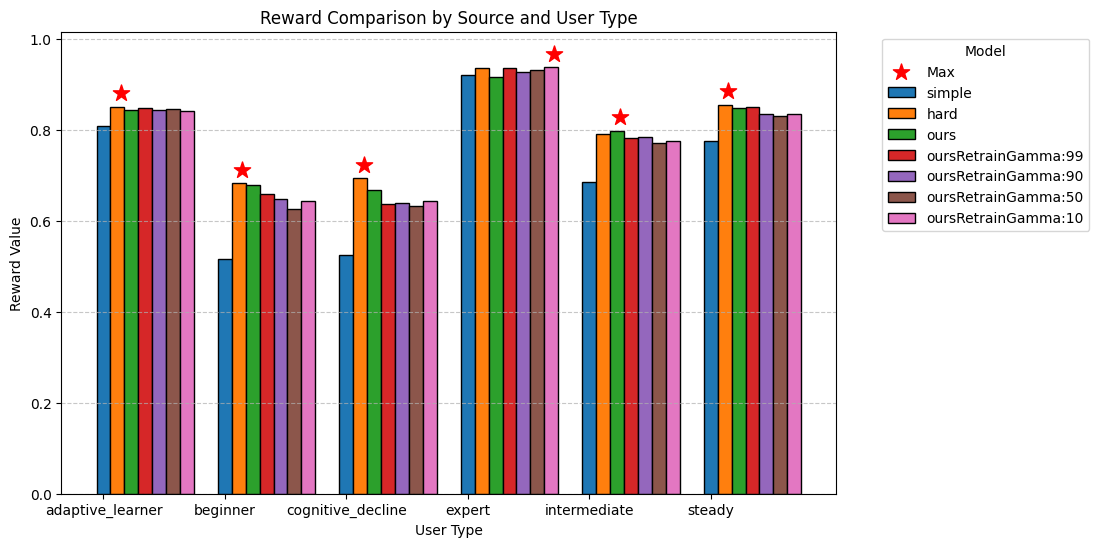

Plot saved to: onApr1NoRandomMinNum10NumExp5RegBeginnerAndGamma_allStates/violin_difficulty.png


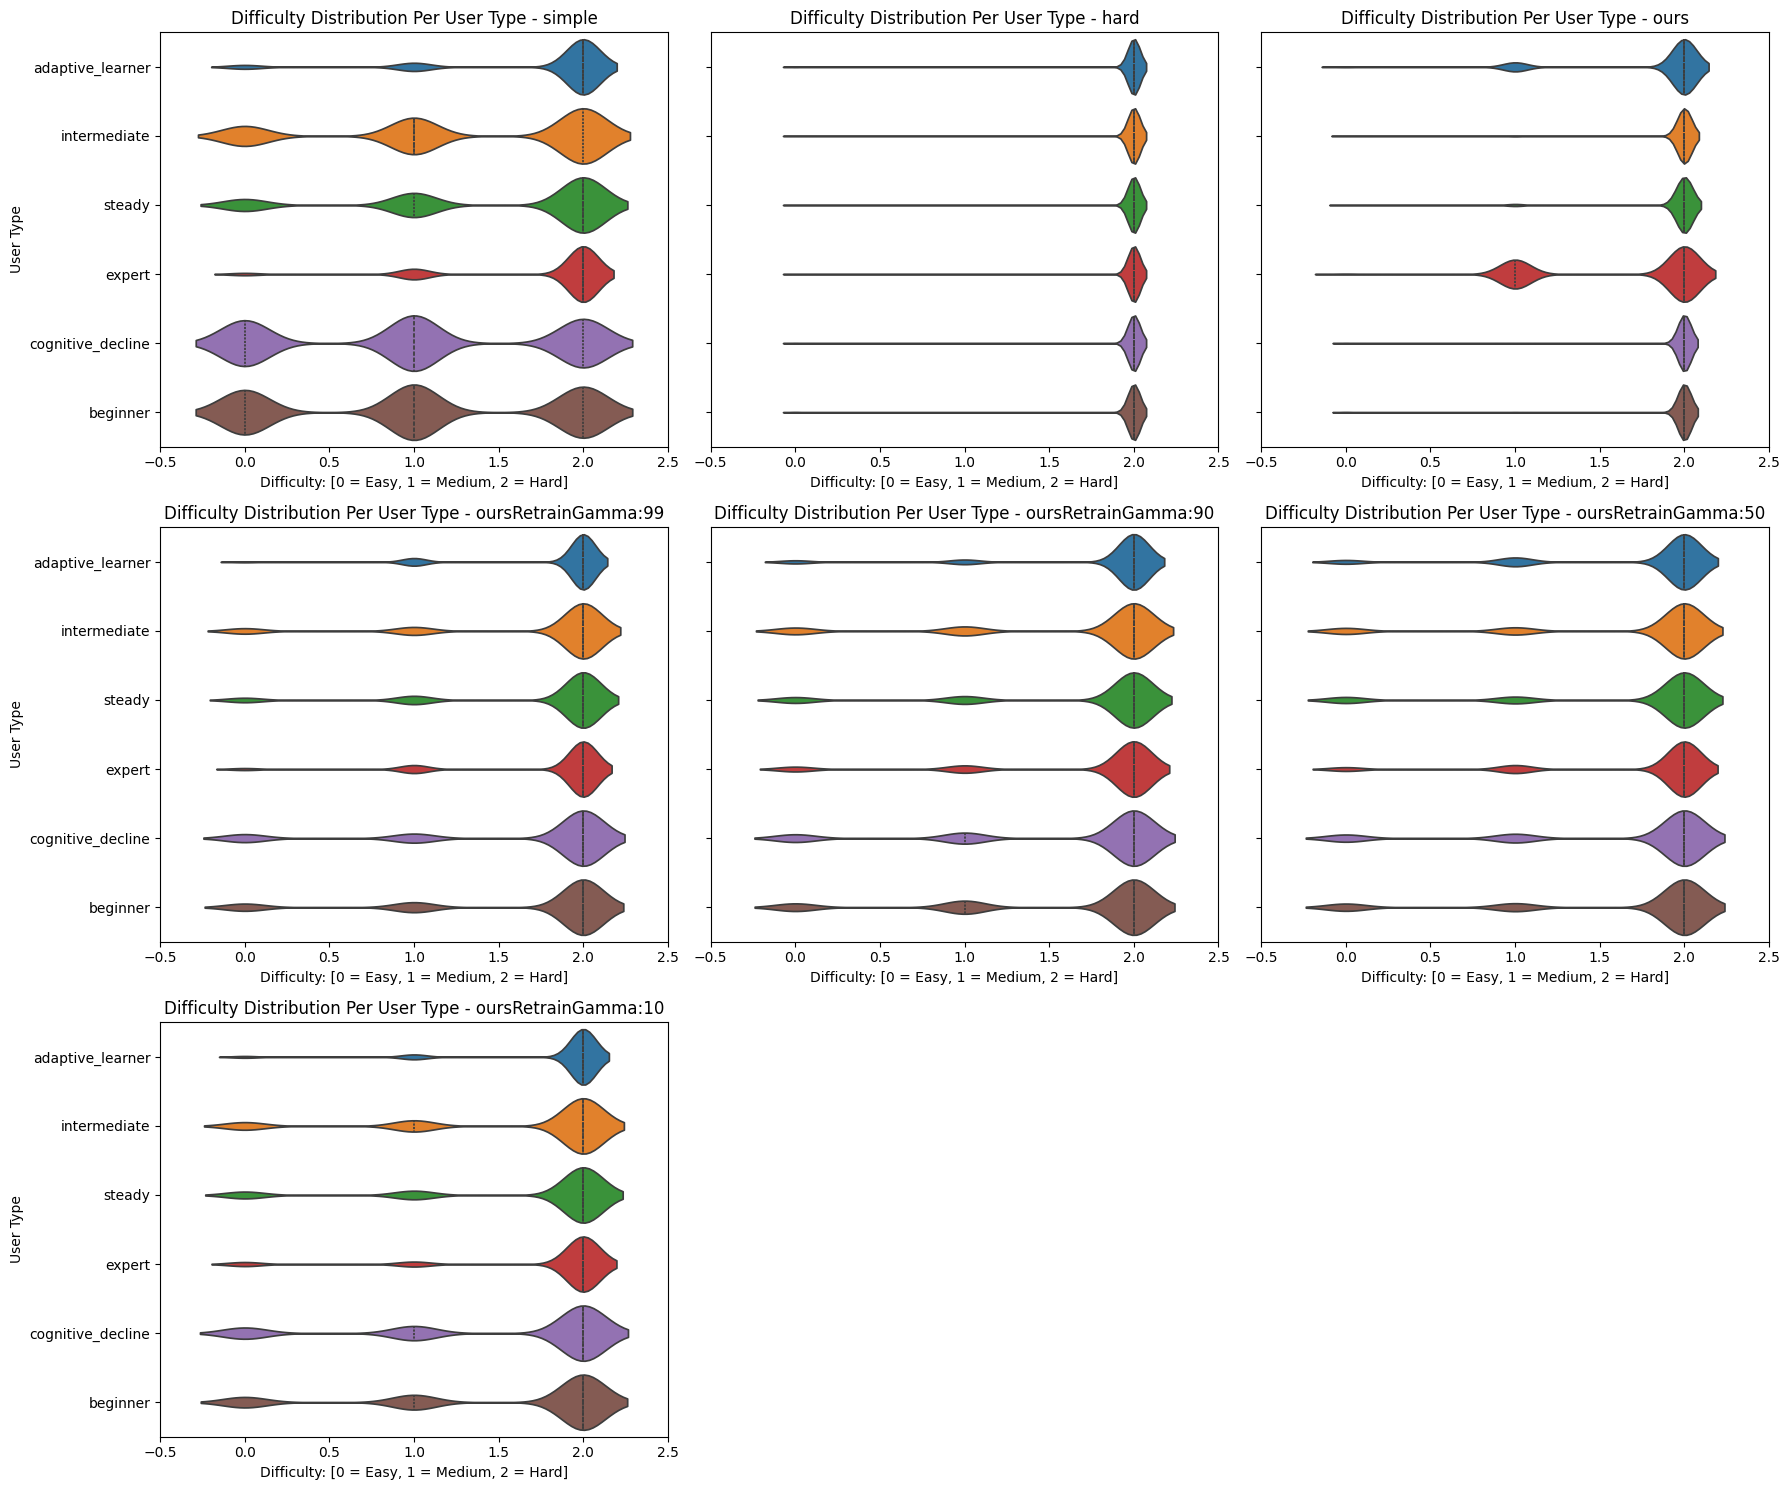

Plot saved to: onApr1NoRandomMinNum10NumExp5RegBeginnerAndGamma_allStates/violin_reward.png


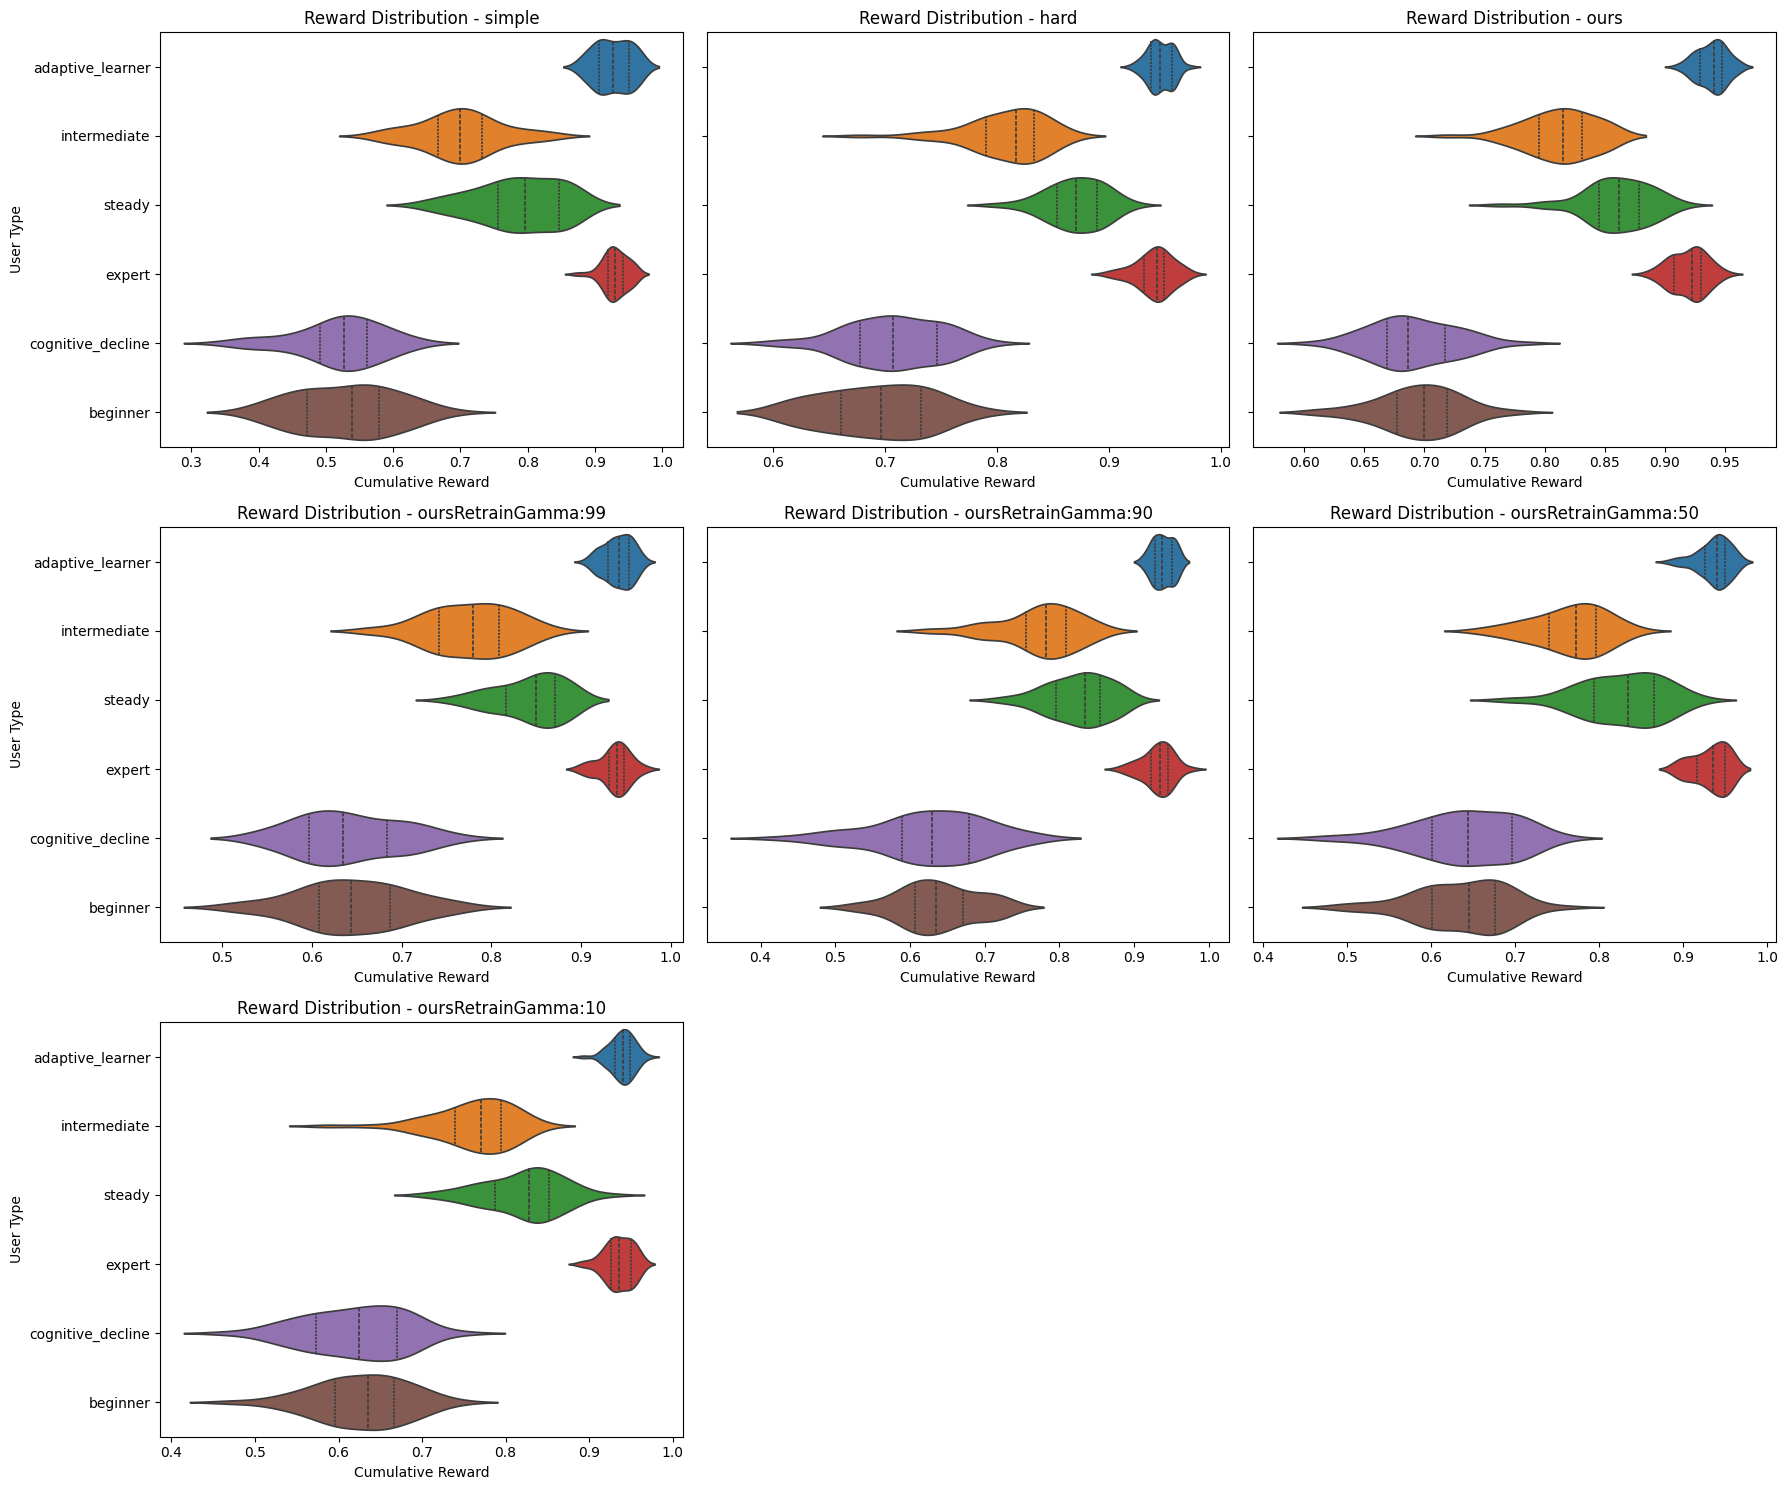

In [8]:
visualize_reward_new(avg_cumulative_reward_new_all, experiment_output_name)

# Dictionary to store filtered data for each model type
filtered_data = {
    model: experimentation_results[experimentation_results['Model Type'] == model][cols_to_keep].rename(columns=new_cols)
    for model in model_types
}
max_questions = max(experimentation_results['Question Number'])

violin_difficulty_multi(filtered_data, experiment_output_name)
violin_reward_multi(filtered_data, max_questions, experiment_output_name)

In [9]:
avg_cumulative_reward_new_all.to_csv('./' + experiment_output_name + '/average_cum_reward.csv')